In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('test_df.csv')

In [3]:
df.head()

,sample,AF1,AF2,AF7,AF8,AFZ,C1,C2,C3,C4,...,TP7,TP8,X,Y,nd,subject,alcoholic,match,err,object
0,0,-2.797,-3.448,-0.305,-4.089,-2.797,0.315,1.088,0.651,2.370,...,-8.860,-0.071,-5.544,-4.873,-4.089,co2a0000377,True,nomatch,False,False
1,1,-2.309,-3.937,1.160,-5.066,-3.286,0.804,1.088,1.628,1.882,...,-8.372,0.417,-6.032,-1.943,-0.183,co2a0000377,True,nomatch,False,False
2,2,-1.333,-3.448,2.625,-5.554,-2.797,1.292,0.600,3.092,1.882,...,-3.977,0.905,-4.079,1.475,3.723,co2a0000377,True,nomatch,False,False
3,3,-0.356,-2.472,2.136,-5.066,-1.821,0.804,0.600,3.092,1.394,...,3.347,0.905,-1.149,3.428,5.188,co2a0000377,True,nomatch,False,False
4,4,0.621,-1.495,1.160,-4.578,-0.844,0.315,0.112,2.604,0.417,...,10.183,-0.071,2.268,3.916,2.747,co2a0000377,True,nomatch,False,False


In [5]:
column_names_index = df.columns

    # Get column names as a list
column_names_list = df.columns.tolist()

print(column_names_index)
print(column_names_list)

Index(['sample', 'AF1', 'AF2', 'AF7', 'AF8', 'AFZ', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ', 'CZ', 'F1',
       'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4',
       'FC5', 'FC6', 'FCZ', 'FP1', 'FP2', 'FPZ', 'FT7', 'FT8', 'FZ', 'O1',
       'O2', 'OZ', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO1',
       'PO2', 'PO7', 'PO8', 'POZ', 'PZ', 'T7', 'T8', 'TP7', 'TP8', 'X', 'Y',
       'nd', 'subject', 'alcoholic', 'match', 'err', 'object'],
      dtype='object')
['sample', 'AF1', 'AF2', 'AF7', 'AF8', 'AFZ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ', 'CZ', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCZ', 'FP1', 'FP2', 'FPZ', 'FT7', 'FT8', 'FZ', 'O1', 'O2', 'OZ', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'POZ', 'PZ', 'T7', 'T8', 'TP7', 'TP8', 'X', 'Y', 'nd', 'subject', 'alcoholic', 'match'

In [6]:
df['alcoholic'].value_counts()

alcoholic
True     76800
False    76800
Name: count, dtype: int64

In [9]:
drop_cols = ['sample', 'subject', 'match', 'err', 'object', 'X', 'Y', 'nd']
df_clean = df.drop(columns=drop_cols)

X = df_clean.drop('alcoholic', axis=1)
y = df_clean['alcoholic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn.predict(X_test)

In [12]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Confusion Matrix:
[[13695  1707]
 [  291 15027]]

Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.89      0.93     15402
        True       0.90      0.98      0.94     15318

    accuracy                           0.93     30720
   macro avg       0.94      0.94      0.93     30720
weighted avg       0.94      0.93      0.93     30720

Accuracy: 0.93


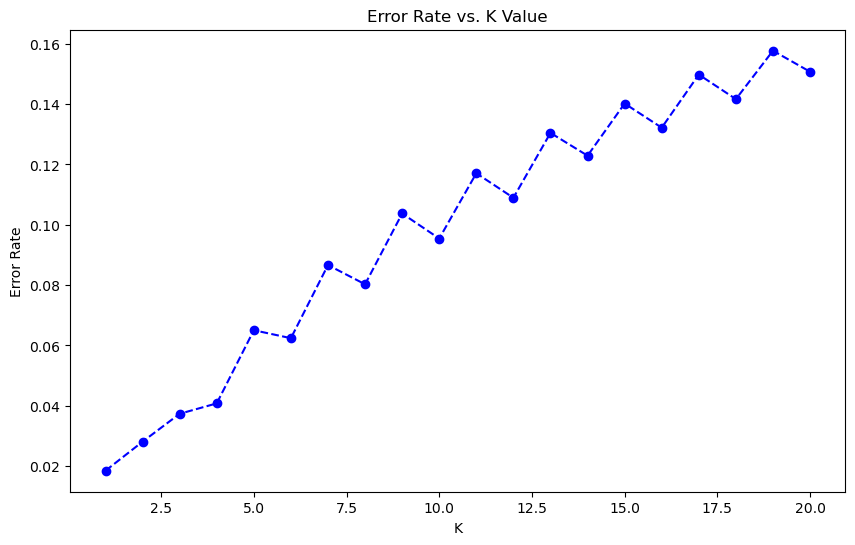

In [13]:
error_rates = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred_k)
    error_rates.append(error)

plt.figure(figsize=(10,6))
plt.plot(range(1, 21), error_rates, color='blue', linestyle='dashed', marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()